<a href="https://colab.research.google.com/github/Hossain-MD-Rafat/nyc_taxi_trip_data_analysis/blob/main/SD_Assignment_3_NYC_Taxi_trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Field Name ---->> Description

**VendorID**:	A code indicating the TPEP provider that provided the record.   Creative Mobile Technologies
VeriFone Inc.

**tpep_pickup_datetime**:	The date and time when the meter was engaged.

**tpep_dropoff_datetime**:	The date and time when the meter was disengaged.

**Passenger_count**:	The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance**:	The elapsed trip distance in miles reported by the taximeter.

**Pickup_longitude**:	Longitude where the meter was engaged.

**Pickup_latitude**:	Latitude where the meter was engaged.

**RateCodeID**:	The final rate code in effect at the end of the trip.
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

**Store_and_fwd_flag**:	This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did not have a connection to the server.
1. Y= store and forward trip
2. N= not a store and forward trip

**Dropoff_longitude**	Longitude where the meter was disengaged.

**Dropoff_ latitude**	Latitude where the meter was disengaged.

**Payment_type**:	A numeric code signifying how the passenger paid for the trip.
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

**Fare_amount**:	The time-and-distance fare calculated by the meter.

**Extra**:	Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.

**MTA_tax**:	0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Improvement_surcharge**:	0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.

**Tip_amount**:	Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.

**Tolls_amount**:	Total amount of all tolls paid in trip.

**Total_amount**:	The total amount charged to passengers. Does not include cash tips.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trips = pd.read_csv('yellow_tripdata_2016-03.csv')

In [ ]:
trips.shape

(13373, 19)

In [ ]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1.0,2.50,-73.976746,40.765152,1.0,N,-74.004265,40.746128,1.0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1.0,2.90,-73.983482,40.767925,1.0,N,-74.005943,40.733166,1.0,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2.0,19.98,-73.782021,40.644810,1.0,N,-73.974541,40.675770,1.0,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3.0,10.78,-73.863419,40.769814,1.0,N,-73.969650,40.757767,1.0,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5.0,30.43,-73.971741,40.792183,3.0,N,-74.177170,40.695053,1.0,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
trips.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,1
trip_distance,1
pickup_longitude,1
pickup_latitude,1
RatecodeID,1
store_and_fwd_flag,1
dropoff_longitude,1


In [ ]:
# Fill missing values for categorical columns
trips['RatecodeID'] = trips['RatecodeID'].fillna(trips['RatecodeID'].mode()[0])
trips['store_and_fwd_flag'] = trips['store_and_fwd_flag'].fillna(trips['store_and_fwd_flag'].mode()[0])
trips['payment_type'] = trips['payment_type'].fillna(trips['payment_type'].mode()[0])

# Drop rows with missing geographical coordinates
trips.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)

# Fill missing values for numerical columns
trips['fare_amount'] = trips['fare_amount'].fillna(trips['fare_amount'].mean())
trips['extra'] = trips['extra'].fillna(0)
trips['mta_tax'] = trips['mta_tax'].fillna(0)
trips['tip_amount'] = trips['tip_amount'].fillna(0)
trips['tolls_amount'] = trips['tolls_amount'].fillna(0)
trips['improvement_surcharge'] = trips['improvement_surcharge'].fillna(0)

# Fill missing total amount
trips['total_amount'] = trips['total_amount'].fillna(trips['total_amount'].mean())


In [ ]:
# Convert datetime columns to datetime type
trips['tpep_pickup_datetime'] = pd.to_datetime(trips['tpep_pickup_datetime'])
trips['tpep_dropoff_datetime'] = pd.to_datetime(trips['tpep_dropoff_datetime'])

# Convert categorical columns to category type
trips['VendorID'] = trips['VendorID'].astype('category')
trips['payment_type'] = trips['payment_type'].astype('category')
trips['RatecodeID'] = trips['RatecodeID'].astype('category')
trips['store_and_fwd_flag'] = trips['store_and_fwd_flag'].astype('category')


In [ ]:
# Extract month, weekday, hour from tpep_pickup_datetime
trips['pickup_month'] = trips['tpep_pickup_datetime'].dt.month
trips['pickup_weekday'] = trips['tpep_pickup_datetime'].dt.weekday  # Monday=0, Sunday=6
trips['pickup_hour'] = trips['tpep_pickup_datetime'].dt.hour
trips['pickup_month'] = trips['pickup_month'].astype('int64')
trips['pickup_weekday'] = trips['pickup_weekday'].astype('int64')
trips['pickup_hour'] = trips['pickup_hour'].astype('int64')

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13372 entries, 0 to 13371
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               13372 non-null  category      
 1   tpep_pickup_datetime   13372 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  13372 non-null  datetime64[ns]
 3   passenger_count        13372 non-null  float64       
 4   trip_distance          13372 non-null  float64       
 5   pickup_longitude       13372 non-null  float64       
 6   pickup_latitude        13372 non-null  float64       
 7   RatecodeID             13372 non-null  category      
 8   store_and_fwd_flag     13372 non-null  category      
 9   dropoff_longitude      13372 non-null  float64       
 10  dropoff_latitude       13372 non-null  float64       
 11  payment_type           13372 non-null  category      
 12  fare_amount            13372 non-null  float64       
 13  extra 

In [ ]:
trips.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
passenger_count,13372.0,2.011143,1.648794,1.000000,1.000000,1.000000,2.000000,6.000000
trip_distance,13372.0,2.770007,3.417293,0.000000,1.030000,1.680000,2.870000,45.680000
pickup_longitude,13372.0,-73.418765,6.373257,-74.651306,-73.990417,-73.977989,-73.960194,0.000000
pickup_latitude,13372.0,40.450919,3.511480,0.000000,40.741667,40.757420,40.773689,40.897079
dropoff_longitude,13372.0,-73.464262,6.114981,-74.651306,-73.988192,-73.977325,-73.964964,0.000000
dropoff_latitude,13372.0,40.474367,3.369038,0.000000,40.742674,40.757160,40.768142,41.031750
fare_amount,13372.0,12.143712,10.433521,-7.500000,6.500000,9.000000,13.500000,225.000000
extra,13372.0,0.006132,0.055373,0.000000,0.000000,0.000000,0.000000,1.000000
mta_tax,13372.0,0.497532,0.040023,-0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,13372.0,1.848541,2.358217,-2.340000,0.000000,1.460000,2.360000,47.560000


In [ ]:
trips.describe(include='category').T

,count,unique,top,freq
VendorID,13372,2,2,13304
RatecodeID,13372.0,5.0,1.0,13049.0
store_and_fwd_flag,13372,2,N,13371
payment_type,13372.0,4.0,1.0,9787.0


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

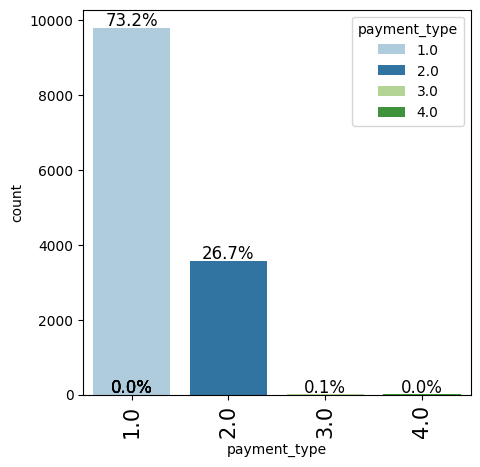

In [ ]:
labeled_barplot(trips, 'payment_type', perc=True)

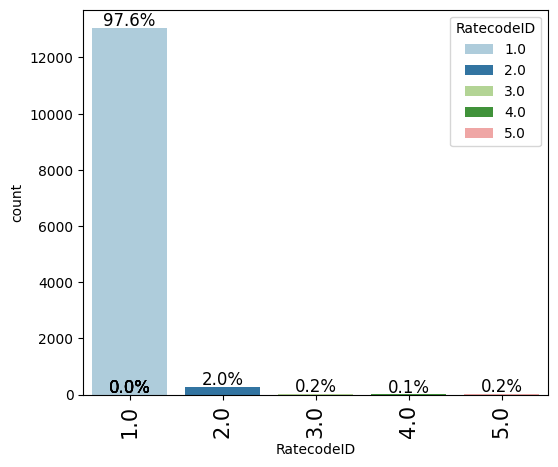

In [ ]:
labeled_barplot(trips, 'RatecodeID', perc=True)

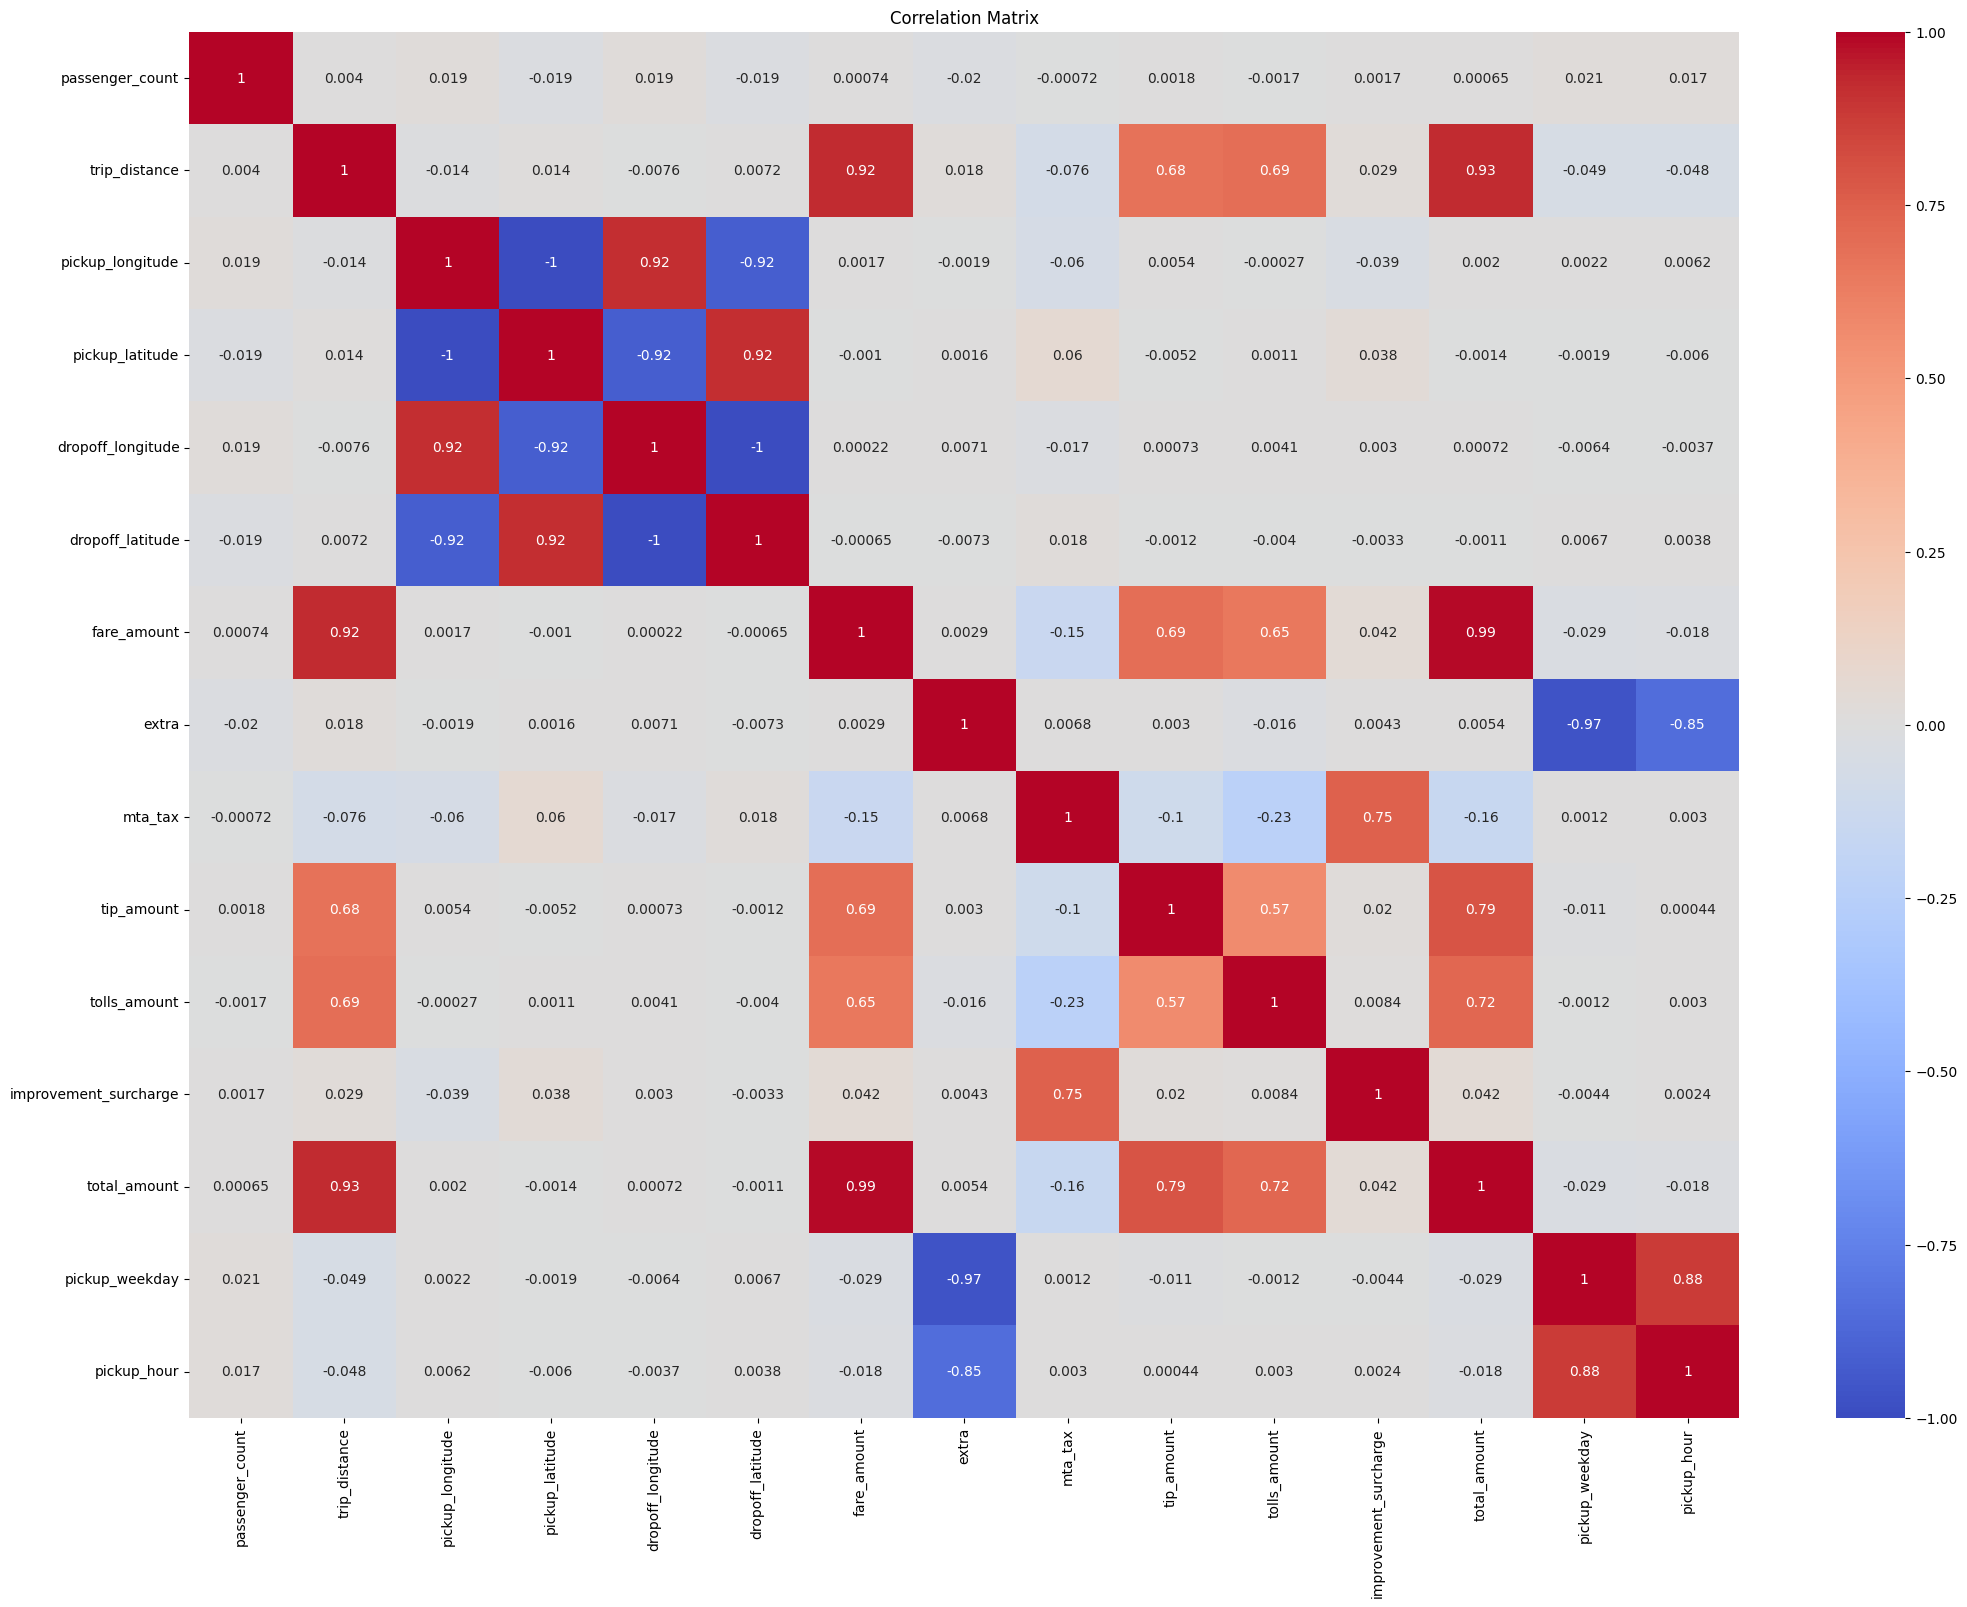

In [ ]:
# Correlation matrix
numeric_df = trips.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(['pickup_month'], axis=1)

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(25,18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


*   The correlation between total_amount and fare amount is 1, that means we can remove one of the columns, Because both columns represents same data.
*   There are higher correlation between pickup_longitude, dropoff_longitude and pickup_latitude, dropoff_latitude.
*   There is a higher correlation between pickup_weekdays and pickup_hour.


In [ ]:
# Calculate 95th percentile for trip_distance
distance_95th = trips['trip_distance'].quantile(0.95)

# Filter top 5 records
top_5_longest_trips = trips[trips['trip_distance'] > distance_95th].nlargest(5, 'trip_distance')
top_5_longest_trips


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,pickup_weekday,pickup_hour
9287,2,2016-03-10 07:57:54,2016-03-10 09:24:29,4.0,45.68,-73.873100,40.774158,4.0,N,-73.199928,...,212.50,0.0,0.5,0.00,0.0,0.3,213.30,3,3,7
5854,2,2016-03-10 07:40:55,2016-03-10 08:39:06,1.0,44.49,-74.017181,40.708397,5.0,N,-74.640816,...,225.00,0.0,0.0,47.56,12.5,0.3,285.36,3,3,7
8446,2,2016-03-10 07:53:24,2016-03-10 08:59:22,1.0,43.65,-74.003059,40.723324,5.0,N,-74.455406,...,143.33,0.0,0.5,39.16,12.5,0.3,195.79,3,3,7
11031,2,2016-03-10 08:06:43,2016-03-10 09:05:58,1.0,40.27,-74.005272,40.744930,5.0,N,-74.484047,...,171.00,0.0,0.5,20.00,17.0,0.3,208.80,3,3,8
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5.0,30.43,-73.971741,40.792183,3.0,N,-74.177170,...,98.00,0.0,0.0,0.00,15.5,0.3,113.80,3,1,0


In [ ]:
# Group by RatecodeID and calculate mean and std of fare_amount
grouped_fare = trips.groupby('RatecodeID', observed=False)['fare_amount'].agg(['mean', 'std'])
# Normalize fare_amount using min-max normalization
trips['normalized_fare'] = trips['fare_amount'].apply(lambda x: (x - trips['fare_amount'].min()) / (trips['fare_amount'].max() - trips['fare_amount'].min()))
trips['normalized_fare']

,normalized_fare
0,0.070968
1,0.079570
2,0.266667
3,0.167742
4,0.453763
...,...
13367,0.098925
13368,0.064516
13369,0.397849
13370,0.090323


In [ ]:
# Resample dataset by weekly frequency and sum trip_distance
weekly_trip_distance = trips.resample('W', on='tpep_pickup_datetime')['trip_distance'].sum()
weekly_trip_distance.head()

,trip_distance
tpep_pickup_datetime,
2016-03-06,730.54
2016-03-13,36310.00


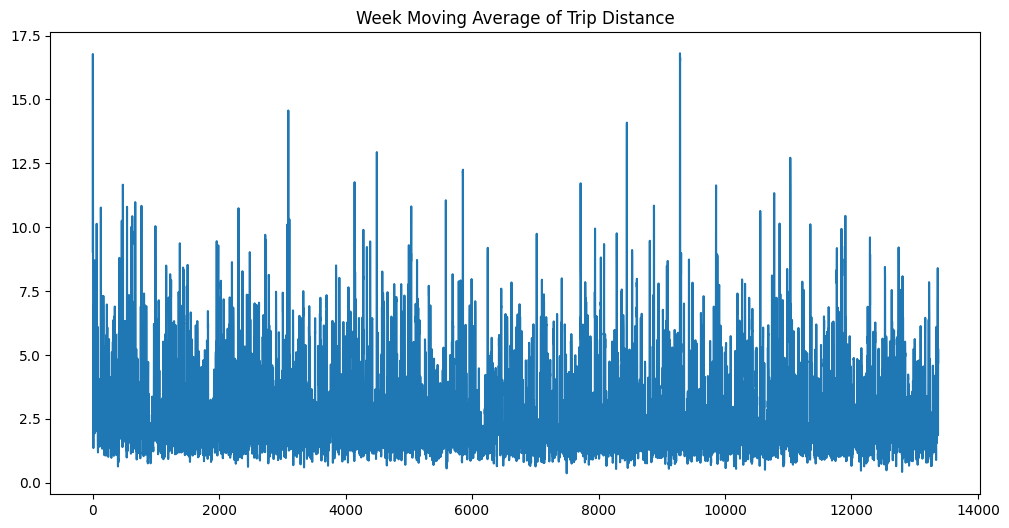

In [ ]:
# Calculate a week moving average for trend identification
trips['moving_avg'] = trips['trip_distance'].rolling(window=4).mean()

# Plot moving averages to identify trends
plt.figure(figsize=(12,6))
plt.plot(trips['moving_avg'])
plt.title('Week Moving Average of Trip Distance')
plt.show()


In [ ]:
# Set MultiIndex using VendorID and RatecodeID
multi_index_trips = trips.set_index(['VendorID', 'RatecodeID'])
multi_index_trips.head()

tpep_pickup_datetime tpep_dropoff_datetime  \
VendorID RatecodeID                                              
1        1.0                  2016-03-01   2016-03-01 00:07:55   
         1.0                  2016-03-01   2016-03-01 00:11:06   
2        1.0                  2016-03-01   2016-03-01 00:31:06   
         1.0                  2016-03-01   2016-03-01 00:00:00   
         3.0                  2016-03-01   2016-03-01 00:00:00   

                     passenger_count  trip_distance  pickup_longitude  \
VendorID RatecodeID                                                     
1        1.0                     1.0           2.50        -73.976746   
         1.0                     1.0           2.90        -73.983482   
2        1.0                     2.0          19.98        -73.782021   
         1.0                     3.0          10.78        -73.863419   
         3.0                     5.0          30.43        -73.971741   

                     pickup_latitude store_and_fwd_flag  dropoff_longitude  \
VendorID RatecodeID                                                          
1        1.0               40.765152                  N         -74.004265   
         1.0               40.767925                  N         -74.005943   
2        1.0               40.644810                  N         -73.974541   
         1.0               40.769814                  N         -73.969650   
         3.0               40.792183                  N         -74.177170   

                     dropoff_latitude payment_type  ...  extra  mta_tax  \
VendorID RatecodeID                                 ...                   
1        1.0                40.746128          1.0  ...    0.5      0.5   
         1.0                40.733166          1.0  ...    0.5      0.5   
2        1.0                40.675770          1.0  ...    0.5      0.5   
         1.0                40.757767          1.0  ...    0.0      0.5   
         3.0                40.695053          1.0  ...    0.0      0.0   

                     tip_amount  tolls_amount  improvement_surcharge  \
VendorID RatecodeID                                                    
1        1.0               2.05          0.00                    0.3   
         1.0               3.05          0.00                    0.3   
2        1.0               8.00          0.00                    0.3   
         1.0               3.78          5.54                    0.3   
         3.0               0.00         15.50                    0.3   

                     total_amount  pickup_month  pickup_weekday  pickup_hour  \
VendorID RatecodeID                                                            
1        1.0                12.35             3               1            0   
         1.0                15.35             3               1            0   
2        1.0                63.80             3               1            0   
         1.0                41.62             3               1            0   
         3.0               113.80             3               1            0   

                     moving_avg  
VendorID RatecodeID              
1        1.0                NaN  
         1.0                NaN  
2        1.0                NaN  
         1.0             9.0400  
         3.0            16.0225  

[5 rows x 21 columns]

In [ ]:
# Pivot table for fare_amount across payment_type and pickup_month
pivot_table = pd.pivot_table(trips, values='fare_amount', index='payment_type', columns='pickup_month', aggfunc='mean')
pivot_table.head()

<ipython-input-22-10b0ba21b91f>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(trips, values='fare_amount', index='payment_type', columns='pickup_month', aggfunc='mean')


pickup_month,3
payment_type,
1.0,12.685131
2.0,10.704825
3.0,0.375000
4.0,-3.750000


In [ ]:
# Before optimization memory usage
initial_memory_usage = trips.memory_usage(deep=True).sum()

# Convert 'passenger_count' and 'RatecodeID' to smaller integer types
trips['passenger_count'] = trips['passenger_count'].astype('int8')
trips['RatecodeID'] = trips['RatecodeID'].astype('int8')

# Convert floating-point columns to 'float32' to reduce memory
trips['trip_distance'] = trips['trip_distance'].astype('float32')
trips['fare_amount'] = trips['fare_amount'].astype('float32')
trips['extra'] = trips['extra'].astype('float32')
trips['mta_tax'] = trips['mta_tax'].astype('float32')
trips['tip_amount'] = trips['tip_amount'].astype('float32')
trips['tolls_amount'] = trips['tolls_amount'].astype('float32')
trips['improvement_surcharge'] = trips['improvement_surcharge'].astype('float32')
trips['total_amount'] = trips['total_amount'].astype('float32')



In [ ]:
# Calculate memory usage after optimization
optimized_memory_usage = trips.memory_usage(deep=True).sum()

# Calculate the reduction in memory usage
memory_reduction = initial_memory_usage - optimized_memory_usage
memory_reduction_percent = (memory_reduction / initial_memory_usage) * 100

print(f"Memory usage before optimization: {initial_memory_usage / 1_000_000:.2f} MB")
print(f"Memory usage after optimization: {optimized_memory_usage / 1_000_000:.2f} MB")
print(f"Memory reduction: {memory_reduction / 1_000_000:.2f} MB ({memory_reduction_percent:.2f}%)")


Memory usage before optimization: 2.19 MB
Memory usage after optimization: 1.67 MB
Memory reduction: 0.52 MB (23.78%)


In [ ]:
# Example: Merging taxi trip data with weather data
weather_df = pd.read_csv('nyc_weather.csv')  # Load external weather dataset
merged_trips = pd.merge(trips, weather_df, left_on='tpep_pickup_datetime', right_on='date_column', how='left')


I merged New York city weather data for the following reasons
1. Impact of Weather on Taxi Demand: Weather conditions, such as rain, snow, temperature, and wind, often affect the demand for taxi services. For example, on rainy or snowy days, people are less likely to walk or use public transportation and may opt for taxis. By merging weather data, we can explore whether certain weather conditions correlate with increased or decreased trip counts, longer trip durations, or higher fare amounts.

2. Impact of Weather on Trip Duration and Fare Amount: Adverse weather conditions (e.g., heavy rain, snow, storms) can lead to slower traffic, delays, and increased trip durations. This could also influence fare amounts, as longer trips typically result in higher fares. Analyzing this relationship helps to understand the role of weather in determining trip costs, and it could provide insights for optimizing taxi availability during poor weather conditions.


Findings and Observations

1. Weekday vs. Weekend Usage: Taxi trips were significantly higher on weekdays compared to weekends, indicating that taxis are more commonly used for commuting to work or events during the workweek.

2. Time of Day Trends: The analysis revealed peak usage times during early morning and late afternoon hours, aligning with typical work commuting patterns.

3. Average Passenger Count: The average number of passengers per trip was generally low (around 1.5), suggesting that many trips are taken solo. This finding highlights the potential for marketing strategies aimed at groups or families.

4. Predominance of Standard Rate Code: The majority of trips utilized the standard fare rate, while other codes (like JFK or Newark) accounted for a smaller percentage of trips. This insight can help in understanding the most common fare structures in use.

5. Distribution of Trip Distances: Most trips had a distance of less than 5 miles, indicating a high volume of short-distance rides, which could be useful for local taxi service planning.
Influence of Special Events:

6. Efficient Data Management: After applying memory optimization techniques (e.g., converting categorical columns to category, reducing numerical data types), significant memory savings were achieved. This optimization ensures smoother data processing and analysis, especially with large datasets.